In [1]:
import pandas as pd
import numpy as np
import requests
import json
#Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
from matplotlib import style
style.use(['classic','dark_background'])

#Display all columns
pd.set_option('display.max_columns', None)

# Suppress Warnings
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
annual_perf='../Data/AnnualPerformance.csv'
house_inventory='../Data/HousingInventory.csv'
house_manufacturing='../Data/ManufacturingHousingSurvey.csv'
hew_home='../Data/NewHomeSold.csv'
new_residential='../Data/NewResidentialConstruction.csv'
performance_risk_metric='../Data/PerformanceRiskMetrics.csv'
rental_vac='../Data/RentalVacancy.csv'
rate='../Data/InterestRate.csv'

interest_rate=pd.read_csv(rate)
annual_performance=pd.read_csv(annual_perf)
housing_inventory=pd.read_csv(house_inventory)
housing_manufacturing=pd.read_csv(house_manufacturing)
hew_homes=pd.read_csv(hew_home)
new_residential_construction=pd.read_csv(new_residential)
performance_risk_metrics=pd.read_csv(performance_risk_metric)
rental_vacancy=pd.read_csv(rental_vac)

In [3]:
chicago='../Data/Chicago_Crimes.csv'
chicago_crime_statistics=pd.read_csv(chicago)

# Chicago Crime Data

In [4]:
chicago_crime_statistics

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259263,12265079,JE107654,11/01/2020 12:01:00 AM,018XX W ARMITAGE AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,1432,14.0,32.0,22.0,11,NaN,NaN,2020,01/09/2021 03:51:24 PM,NaN,NaN,NaN
7259264,12264660,JE106865,12/10/2020 10:00:00 AM,062XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,06,NaN,NaN,2020,01/09/2021 03:51:24 PM,NaN,NaN,NaN
7259265,12261813,JE102937,01/02/2021 03:30:00 PM,019XX E 93RD ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,413,4.0,8.0,48.0,14,NaN,NaN,2021,01/09/2021 03:51:24 PM,NaN,NaN,NaN
7259266,12259981,JE101700,01/02/2021 09:42:00 PM,037XX W FLOURNOY ST,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,1133,11.0,24.0,27.0,04B,NaN,NaN,2021,01/09/2021 03:51:24 PM,NaN,NaN,NaN


In [5]:
chicago_crime_statistics_df=chicago_crime_statistics.dropna()

In [6]:
crime_type=chicago_crime_statistics_df.groupby(['Primary Type']).count()
sorted_crime_type=crime_type.sort_values(by=['ID'], ascending=False)
top_twenty_crimes=sorted_crime_type[:21] 
top_five_crimes=sorted_crime_type[:5]
top_five_crimes

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Primary Type,,,,,,,,,,,,,,,,,,,,,
THEFT,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559
BATTERY,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793,1206793
CRIMINAL DAMAGE,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772,751772
NARCOTICS,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444,659444
ASSAULT,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657,418657


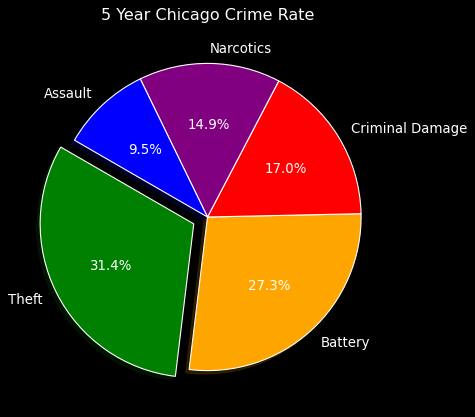

In [7]:
top_five_crimes['ID']
pie_df=top_five_crimes['ID']
## Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(pie_df,
    labels=['Theft', 'Battery', 'Criminal Damage', 'Narcotics', 'Assault'],
    colors=["green", "orange", "red", "purple",  'blue'],
    explode=[0.1, 0, 0,0,0],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("5 Year Chicago Crime Rate")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("ChicagoCrimeRate.png", bbox_inches='tight')
plt.show()

# Annual Performance

In [8]:
annual_performance

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Published:,"Dec 29, 2020",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Effective Date,NaN,Annualized Returns,NaN,NaN
5,NaN,NaN,1 Year,3 Year,5 Year,10 Year
6,Index Level\nS&P CoreLogic Case-Shiller 20-Cit...,Oct-2020,7.95%,5.00%,5.26%,4.96%
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


# Performance Risks

In [9]:
performance_risk_metrics

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,As of:,"Oct 31, 2020",NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Annualized Risk,NaN,NaN,NaN,Annualized Risk - Adj Returns,NaN,NaN
5,NaN,3 Year,5 Year,10 Year,NaN,3 Year,5 Year,10 Year
6,S&P CoreLogic Case-Shiller 20-City Composite H...,1.52%,1.43%,2.63%,NaN,3.29,3.67,1.89
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Housing Inventory

In [10]:
housing_inventory_df=housing_inventory[-21:]
housing_inventory_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'Q1', 'U.S. Census Bureau':'Q2', 'Unnamed: 3':'Q3', 'Unnamed: 4':'Q4' }, inplace=True) 
housing_inventory_df=housing_inventory_df.set_index(['Year'])
# Convert Objects to Floats
housing_inventory_df['Q1']=housing_inventory_df['Q1'].str.replace(',', '').astype(float)
housing_inventory_df['Q2']=housing_inventory_df['Q2'].str.replace(',', '').astype(float)
housing_inventory_df['Q3']=housing_inventory_df['Q3'].str.replace(',', '').astype(float)
housing_inventory_df['Q4']=housing_inventory_df['Q4'].str.replace(',', '').astype(float)
housing_inventory_df['Mean']=housing_inventory_df.mean(axis=1).map('{:.0f}'.format) 

housing_inventory_df.reset_index(inplace=True)
housing_inventory_df['Year']=pd.to_datetime(housing_inventory_df['Year'])
housing_inventory_df['Mean']=housing_inventory_df['Mean'].astype(float)

housing_inventory_df

,Year,Q1,Q2,Q3,Q4,Mean
0,2001-01-01,117347.0,117786.0,118216.0,118635.0,117996.0
1,2002-01-01,119061.0,119483.0,119909.0,120350.0,119701.0
2,2003-01-01,120792.0,121233.0,121682.0,122159.0,121466.0
3,2004-01-01,122632.0,123099.0,123587.0,124096.0,123354.0
4,2005-01-01,124611.0,125118.0,125619.0,126104.0,125363.0
5,2006-01-01,126584.0,127072.0,127548.0,127991.0,127299.0
6,2007-01-01,128439.0,128888.0,129300.0,129634.0,129065.0
7,2008-01-01,129968.0,130303.0,130590.0,130797.0,130414.0
8,2009-01-01,131001.0,131207.0,131375.0,131490.0,131268.0
9,2010-01-01,131622.0,131746.0,131867.0,131988.0,131806.0


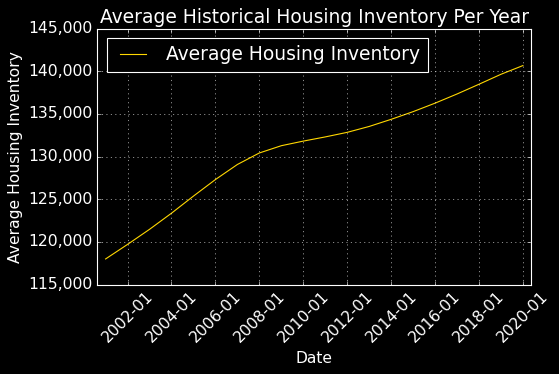

In [11]:
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Housing Inventory')
ax1.plot(housing_inventory_df['Year'],housing_inventory_df['Mean'], color='gold')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Average Historical Housing Inventory Per Year")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='gold', label='Average Housing Inventory')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("HousingInventory.png", bbox_inches='tight')

# Rental Vacancies

In [12]:
rental_vacancy_df=rental_vacancy[-21:]
rental_vacancy_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'Q1', 'U.S. Census Bureau':'Q2', 'Unnamed: 3':'Q3', 'Unnamed: 4':'Q4' }, inplace=True)        
rental_vacancy_df.set_index(['Year'], inplace=True)
# Convert Objects to Floats
rental_vacancy_df['Q1']=rental_vacancy_df['Q1'].astype(float)
rental_vacancy_df['Q2']=rental_vacancy_df['Q2'].astype(float)
rental_vacancy_df['Q3']=rental_vacancy_df['Q3'].astype(float)
rental_vacancy_df['Q4']=rental_vacancy_df['Q4'].astype(float)
# Average the Columns to get Mean for each year
rental_vacancy_df['Mean'] = rental_vacancy_df.mean(axis=1).map('{:.2f}'.format)
rental_vacancy_df.reset_index(inplace=True)
rental_vacancy_df['Year']=pd.to_datetime(rental_vacancy_df['Year']) 
rental_vacancy_df['Mean']=rental_vacancy_df['Mean'].astype(float)
rental_vacancy_df

,Year,Q1,Q2,Q3,Q4,Mean
0,2001-01-01,8.2,8.3,8.4,8.8,8.43
1,2002-01-01,9.1,8.4,9.0,9.3,8.95
2,2003-01-01,9.4,9.6,9.9,10.2,9.77
3,2004-01-01,10.4,10.2,10.1,10.0,10.18
4,2005-01-01,10.1,9.8,9.9,9.6,9.85
5,2006-01-01,9.5,9.6,9.9,9.8,9.70
6,2007-01-01,10.1,9.5,9.8,9.6,9.75
7,2008-01-01,10.1,10.0,9.9,10.1,10.03
8,2009-01-01,10.1,10.6,11.1,10.7,10.62
9,2010-01-01,10.6,10.6,10.3,9.4,10.22


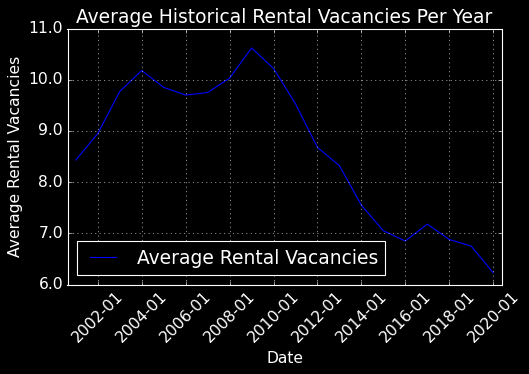

In [13]:
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Rental Vacancies')
ax1.plot(rental_vacancy_df['Year'],rental_vacancy_df['Mean'], color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Average Historical Rental Vacancies Per Year")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='blue', label='Average Rental Vacancies')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("RentalVacancies.png", bbox_inches='tight')

# Housing Manufacturing

In [14]:
housing_manufacturing_df=housing_manufacturing[-8:-1] 
housing_manufacturing_df=housing_manufacturing_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'January', 'U.S. Census Bureau':'February', 'Unnamed: 3':'March', 'Unnamed: 4':'April', 'Unnamed: 5':'May', 'Unnamed: 6':'June', 'Unnamed: 7':'July', 'Unnamed: 8':'August', 'Unnamed: 9':'Spetember', 'Unnamed: 10':'October', 'Unnamed: 11':'November', 'Unnamed: 12':'December'} ) 
housing_manufacturing_df=housing_manufacturing_df.set_index(['Year'])
housing_manufacturing_df['Mean']=housing_manufacturing_df.mean(axis=1)

In [15]:
housing_manufacturing_df['January']=housing_manufacturing_df['January'].astype(float)
housing_manufacturing_df['February']=housing_manufacturing_df['February'].astype(float)
housing_manufacturing_df['March']=housing_manufacturing_df['March'].astype(float)
housing_manufacturing_df['April']=housing_manufacturing_df['April'].astype(float)
housing_manufacturing_df['May']=housing_manufacturing_df['May'].astype(float)
housing_manufacturing_df['June']=housing_manufacturing_df['June'].astype(float)
housing_manufacturing_df['July']=housing_manufacturing_df['July'].astype(float)
housing_manufacturing_df['August']=housing_manufacturing_df['August'].astype(float)
housing_manufacturing_df['Spetember']=housing_manufacturing_df['Spetember'].astype(float)
housing_manufacturing_df['October']=housing_manufacturing_df['October'].astype(float)
housing_manufacturing_df['November']=housing_manufacturing_df['November'].astype(float)
housing_manufacturing_df['December']=housing_manufacturing_df['December'].astype(float)
housing_manufacturing_df['Mean']=housing_manufacturing_df.mean(axis=1)
housing_manufacturing_df

,January,February,March,April,May,June,July,August,Spetember,October,November,December,Mean
Year,,,,,,,,,,,,,
2014,4.4,4.4,4.9,5.7,5.7,5.6,5.7,6.0,5.9,6.5,5.0,4.7,5.375000
2015,5.0,4.8,5.6,6.1,5.8,6.1,6.1,6.3,6.3,6.8,6.0,5.7,5.883333
2016,5.9,6.1,7.1,6.7,6.8,7.3,5.3,7.4,7.3,7.2,7.1,7.0,6.766667
2017,7.8,7.3,8.2,7.2,7.9,8.2,5.8,8.4,7.6,8.6,8.6,7.2,7.733333
2018,8.6,8.1,8.8,8.3,8.8,8.3,6.8,9.2,7.5,8.6,7.7,5.9,8.050000
2019,7.6,7.2,7.6,8.0,8.6,7.8,7.1,8.6,8.0,9.4,8.0,6.7,7.883333
2020,8.7,8.2,8.3,6.6,6.6,7.6,7.5,7.9,8.1,9.0,NaN,NaN,7.850000


In [16]:
housing_manufacturing_df.reset_index(inplace=True)
housing_manufacturing_df['Year']=pd.to_datetime(housing_manufacturing_df['Year'])

In [17]:
housing_manufacturing_df

,Year,January,February,March,April,May,June,July,August,Spetember,October,November,December,Mean
0,2014-01-01,4.4,4.4,4.9,5.7,5.7,5.6,5.7,6.0,5.9,6.5,5.0,4.7,5.375000
1,2015-01-01,5.0,4.8,5.6,6.1,5.8,6.1,6.1,6.3,6.3,6.8,6.0,5.7,5.883333
2,2016-01-01,5.9,6.1,7.1,6.7,6.8,7.3,5.3,7.4,7.3,7.2,7.1,7.0,6.766667
3,2017-01-01,7.8,7.3,8.2,7.2,7.9,8.2,5.8,8.4,7.6,8.6,8.6,7.2,7.733333
4,2018-01-01,8.6,8.1,8.8,8.3,8.8,8.3,6.8,9.2,7.5,8.6,7.7,5.9,8.050000
5,2019-01-01,7.6,7.2,7.6,8.0,8.6,7.8,7.1,8.6,8.0,9.4,8.0,6.7,7.883333
6,2020-01-01,8.7,8.2,8.3,6.6,6.6,7.6,7.5,7.9,8.1,9.0,NaN,NaN,7.850000


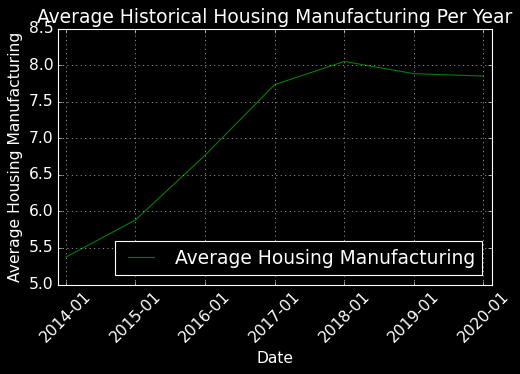

In [18]:
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Housing Manufacturing')
ax1.plot(housing_manufacturing_df['Year'],housing_manufacturing_df['Mean'], color='green')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Average Historical Housing Manufacturing Per Year")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='green', label='Average Housing Manufacturing')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("HousingManufacturing.png", bbox_inches='tight')


# Housing Sales

In [19]:
hew_homes_df=hew_homes[-21:]
hew_homes_df=hew_homes_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'January', 'U.S. Census Bureau':'February', 'Unnamed: 3':'March', 'Unnamed: 4':'April', 'Unnamed: 5':'May', 'Unnamed: 6':'June', 'Unnamed: 7':'July', 'Unnamed: 8':'August', 'Unnamed: 9':'Spetember', 'Unnamed: 10':'October', 'Unnamed: 11':'November', 'Unnamed: 12':'December'})  
hew_homes_df=hew_homes_df.set_index(['Year'])
hew_homes_df

,January,February,March,April,May,June,July,August,Spetember,October,November,December
Year,,,,,,,,,,,,
2001,936,963,939,909,885,882,880,866,853,871,924,979
2002,880,948,923,936,978,957,956,"1,014","1,044","1,006","1,024","1,048"
2003,999,936,999,"1,012","1,078","1,193","1,168","1,206","1,131","1,144","1,093","1,129"
2004,"1,165","1,159","1,276","1,186","1,241","1,180","1,088","1,175","1,214","1,305","1,179","1,242"
2005,"1,203","1,319","1,328","1,260","1,286","1,274","1,389","1,255","1,244","1,336","1,214","1,239"
2006,"1,174","1,061","1,116","1,123","1,086","1,074",965,"1,035","1,016",941,"1,003",998
2007,891,828,833,887,842,793,778,699,686,727,641,619
2008,627,593,535,536,504,487,477,435,433,393,389,377
2009,336,372,339,337,376,393,411,418,386,396,375,352


# New Residential Construction

In [20]:
new_residential_construction_df=new_residential_construction[-21:]
new_residential_construction_df=new_residential_construction_df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':'January', 'U.S. Census Bureau':'February', 'Unnamed: 3':'March', 'Unnamed: 4':'April', 'Unnamed: 5':'May', 'Unnamed: 6':'June', 'Unnamed: 7':'July', 'Unnamed: 8':'August', 'Unnamed: 9':'Spetember', 'Unnamed: 10':'October', 'Unnamed: 11':'November', 'Unnamed: 12':'December'})      
new_residential_construction_df=new_residential_construction_df.set_index(['Year'])
new_residential_construction_df

,January,February,March,April,May,June,July,August,Spetember,October,November,December
Year,,,,,,,,,,,,
2001,"1,699","1,656","1,659","1,666","1,665","1,626","1,598","1,615","1,565","1,566","1,651","1,680"
2002,"1,665","1,787","1,691","1,669","1,716","1,758","1,738","1,695","1,803","1,799","1,771","1,896"
2003,"1,808","1,854","1,757","1,803","1,835","1,875","1,885","1,966","1,961","2,012","1,918","1,987"
2004,"1,952","1,966","2,066","2,070","2,150","2,020","2,112","2,056","2,041","2,097","2,079","2,082"
2005,"2,139","2,114","2,062","2,150","2,085","2,178","2,203","2,219","2,263","2,170","2,218","2,120"
2006,"2,212","2,141","2,118","1,998","1,905","1,867","1,763","1,722","1,655","1,570","1,535","1,638"
2007,"1,626","1,598","1,596","1,470","1,493","1,407","1,361","1,321","1,261","1,192","1,224","1,149"
2008,"1,094","1,014",967,"1,008",995,"1,180",921,858,797,736,626,554
2009,545,558,513,521,556,601,595,616,609,583,623,664


# Interest Rates

In [21]:
interest_rate_df=interest_rate[10:]
interest_rate_df=interest_rate_df.rename(columns= { 'FRED Graph Observations':'Date', 'Unnamed: 1':'Interest Rate'})
interest_rate_df['Date']=pd.to_datetime(interest_rate_df['Date']) 
interest_rate_df['Interest Rate']=interest_rate_df['Interest Rate'].astype(float)
interest_rate_df

,Date,Interest Rate
10,1971-04-02,7.33
11,1971-04-09,7.31
12,1971-04-16,7.31
13,1971-04-23,7.31
14,1971-04-30,7.29
...,...,...
2603,2020-12-10,2.71
2604,2020-12-17,2.67
2605,2020-12-24,2.66
2606,2020-12-31,2.67


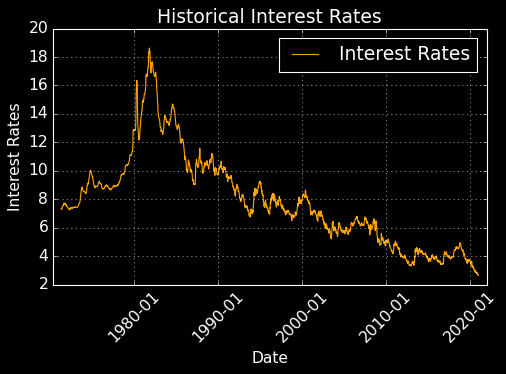

In [22]:
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rates')
ax1.plot(interest_rate_df['Date'],interest_rate_df['Interest Rate'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Historical Interest Rates")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='orange', label='Interest Rates')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("InterestRates.png", bbox_inches='tight')

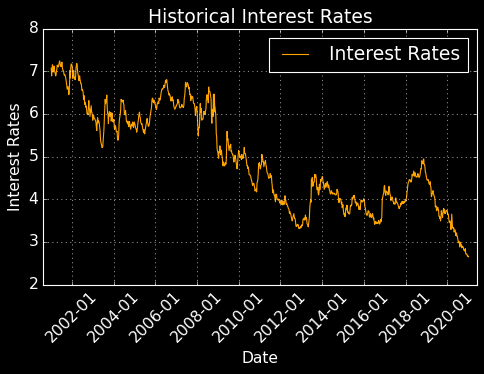

In [23]:
# Filter data by date to only include interest rates after 2000
interest_rate_df_two_thousand=interest_rate_df[interest_rate_df['Date'] >= '2000-12-31']
# plot just crude prices on one graph
fig, ax1=plt.subplots( figsize=(7,4))

ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rates')
ax1.plot(interest_rate_df_two_thousand['Date'],interest_rate_df_two_thousand['Interest Rate'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y') 
ax1.set_title("Historical Interest Rates")
plt.margins(x=.02)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='orange', label='Interest Rates')
plt.legend(handles=[blue_line], loc='best')
plt.savefig("InterestRates.png", bbox_inches='tight')

In [28]:
import feedparser
import pprint
feed=feedparser.parse('https://www.federalreserve.gov/feeds/Data/H15_H15_RIFGFCY10_N.B.XML')

In [29]:
pprint.pprint(feed)

{'bozo': 1,
 'bozo_exception': SAXParseException('syntax error'),
 'encoding': 'ISO-8859-1',
 'entries': [],
 'feed': {'html': {'class': 'no-js', 'lang': 'en'},
          'links': [{'href': 'https://www.federalreserve.gov/css/bootstrap.css',
                     'rel': 'stylesheet',
                     'type': 'text/css'},
                    {'href': 'https://www.federalreserve.gov/css/bluesteel-theme.css',
                     'rel': 'stylesheet',
                     'type': 'text/css'},
                    {'href': 'https://www.federalreserve.gov/css/icons.fallback.css',
                     'rel': 'stylesheet',
                     'type': 'text/html'}],
          'meta': {'content': 'The Federal Reserve Board of Governors in '
                              'Washington DC.',
                   'name': 'description'},
          'script': {'type': 'text/javascript'},
          'summary': '<a class="globalskip" '
                     'href="https://www.federalreserve.gov/feeds/Data/

                     '\n'
                     '                                <li>\n'
                     '                                    <a '
                     'class="sr-only-focusable" '
                     'href="https://www.federalreserve.gov/data/scoos.htm">Senior '
                     'Credit Officer Opinion Survey on Dealer Financing '
                     'Terms</a>\n'
                     '                                </li>\n'
                     '                            </ul>\n'
                     '                            <ul class="col-sm-3 '
                     'list-unstyled col-nav">\n'
                     '                                <li '
                     'class="nav__header">\n'
                     '                                    <p>\n'
                     '                                        <strong>Exchange '
                     'Rates and International Data</strong>\n'
                     '                          